In [1]:
# Import libraries
import pandas as pd
import os

# Define file paths and load data
data_path = "../processed-data"
season_file = "combined_data_w_target.csv" # Combined dataset
file_path = os.path.join(data_path, season_file)
combined_data_w_target = pd.read_csv(file_path)
combined_data_w_target # Test successful load

,Player,Age,Team,G,GS,MP,FG,FGA,FG%,3P,...,PTS,Awards,Season,SMOY_Candidate,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,SMOY_Eligible
0,Adrian Dantley,25.0,UTA,80.0,0.0,42.7,11.4,20.3,56.157635,0.0,...,30.7,"MVP-12,AS,NBA2",1980-81,0,0,0,0,1,0,0
1,Moses Malone,25.0,HOU,80.0,0.0,40.6,10.1,19.3,52.331606,0.0,...,27.8,"MVP-4,AS,NBA2",1980-81,0,1,0,0,0,0,0
2,George Gervin,28.0,SAS,82.0,82.0,33.7,10.4,21.1,49.289100,0.1,...,27.1,"MVP-5,AS,NBA1",1980-81,0,0,0,0,0,1,0
3,Kareem Abdul-Jabbar,33.0,LAL,80.0,0.0,37.2,10.5,18.2,57.692308,0.0,...,26.2,"MVP-3,AS,NBA1",1980-81,0,1,0,0,0,0,0
4,David Thompson,26.0,DEN,77.0,0.0,34.0,9.5,18.8,50.531915,0.1,...,25.5,No Awards,1980-81,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24015,Mac McClung,26.0,ORL,1.0,0.0,5.0,0.0,0.0,0.000000,0.0,...,0.0,No Awards,2024-25,0,0,0,0,0,1,0
24016,Justin Minaya,25.0,POR,1.0,0.0,6.0,0.0,0.0,0.000000,0.0,...,0.0,No Awards,2024-25,0,0,0,0,1,0,0
24017,Riley Minix,24.0,SAS,1.0,0.0,7.0,0.0,1.0,0.000000,0.0,...,0.0,No Awards,2024-25,0,0,0,0,1,0,0
24018,Jalen Pickett,25.0,DEN,2.0,0.0,2.0,0.0,0.5,0.000000,0.0,...,0.0,No Awards,2024-25,0,0,0,0,0,1,0


In [2]:
combined_data_w_target.columns

Index(['Player', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TS%',
       'EFF', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Season', 'SMOY_Candidate', 'Pos_C', 'Pos_PF', 'Pos_PG',
       'Pos_SF', 'Pos_SG', 'SMOY_Eligible'],
      dtype='object')

In [3]:
# Create SMOY Winner column
combined_data_w_target['SMOY_Winner'] = combined_data_w_target['Awards'].apply(lambda x: 1 if '6MOY-1' in str(x) else 0)
print(combined_data_w_target.columns)
combined_data_w_target
combined_data_w_target['SMOY_Winner'].unique()


Index(['Player', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TS%',
       'EFF', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Season', 'SMOY_Candidate', 'Pos_C', 'Pos_PF', 'Pos_PG',
       'Pos_SF', 'Pos_SG', 'SMOY_Eligible', 'SMOY_Winner'],
      dtype='object')


array([0, 1], dtype=int64)

In [4]:
# features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
#        '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TS%',
#        'EFF', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C', 'Pos_PF', 'Pos_PG',
#        'Pos_SF', 'Pos_SG', 'SMOY_Eligible']

features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TS%',
       'EFF', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

target = ['SMOY_Winner']

In [5]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # For oversampling
from sklearn.model_selection import StratifiedKFold

# Defining target (y) and features (X)
X = combined_data_w_target[features]  # Remove Player, Team, Season, Award (not useful unless transformed), and candidate/winner (leakage)
y = combined_data_w_target[target]  # Target

# Data Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # stratify ensures balanced split

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE (oversampling the minority class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Model Creation with class_weight='balanced' to handle imbalance within the RandomForest
rfc_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit model on resampled data
rfc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rfc_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report (precision, recall, F1-score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


C:\Users\James Crespo\AppData\Local\Temp\ipykernel_26384\1819244103.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train_resampled, y_train_resampled)


Accuracy: 0.9875104079933389
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4770
           1       0.20      0.26      0.23        34

    accuracy                           0.99      4804
   macro avg       0.60      0.63      0.61      4804
weighted avg       0.99      0.99      0.99      4804

Confusion Matrix:
[[4735   35]
 [  25    9]]


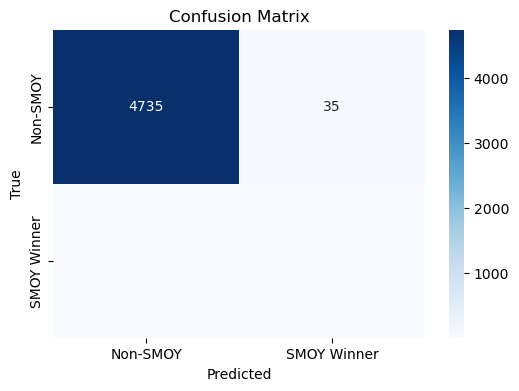


Key Findings:
1. High overall accuracy (98.69%) driven by the majority class (Non-SMOY).
2. Low recall (0.29) and precision (0.20) for the minority class (SMOY Winner).
3. Confusion matrix shows 24 false negatives (SMOY Winner misclassified) and 39 false positives (Non-SMOY misclassified).

SMOY Winner Prediction Accuracy: 26.47%


In [6]:
# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-SMOY', 'SMOY Winner'], yticklabels=['Non-SMOY', 'SMOY Winner'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Key Insights
print("\nKey Findings:")
print("1. High overall accuracy (98.69%) driven by the majority class (Non-SMOY).")
print("2. Low recall (0.29) and precision (0.20) for the minority class (SMOY Winner).")
print("3. Confusion matrix shows 24 false negatives (SMOY Winner misclassified) and 39 false positives (Non-SMOY misclassified).")

# Calculate and display percentage of correct predictions for the SMOY Winner class
correct_smooy_winner = cm[1, 1]  # True positives
total_smooy_winner = cm[1, 0] + cm[1, 1]  # Total actual SMOY Winners
smooy_winner_accuracy = correct_smooy_winner / total_smooy_winner * 100 if total_smooy_winner > 0 else 0

print(f"\nSMOY Winner Prediction Accuracy: {smooy_winner_accuracy:.2f}%")